<a href="https://colab.research.google.com/github/pereruannabaala/Image_Enhancement/blob/main/Image_Enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

In [3]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [4]:
URL = r"https://www.dropbox.com/s/0oe92zziik5mwhf/opencv_bootcamp_assets_NB4.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB4.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

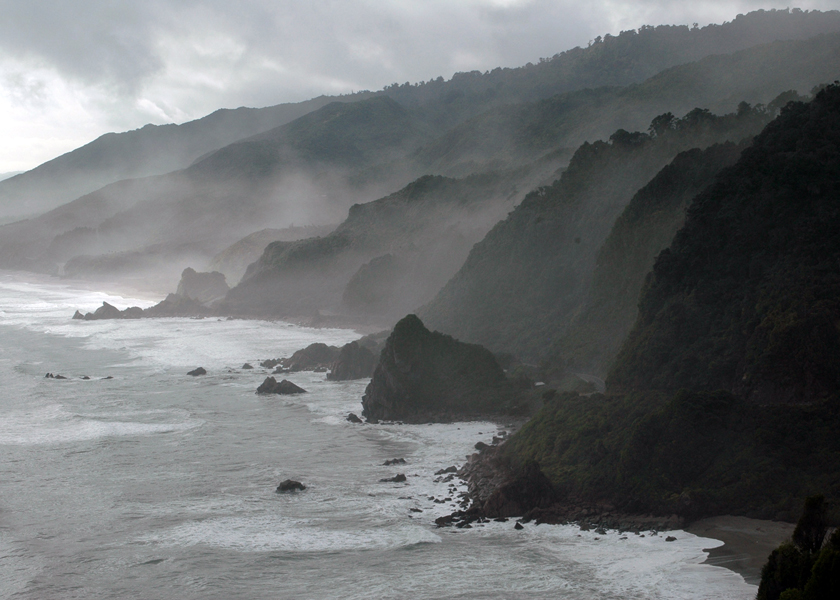

In [5]:
img_bgr = cv2.imread("New_Zealand_Coast.jpg", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Display 18x18 image
Image(filename="New_Zealand_Coast.jpg")

# Addition or Brightness

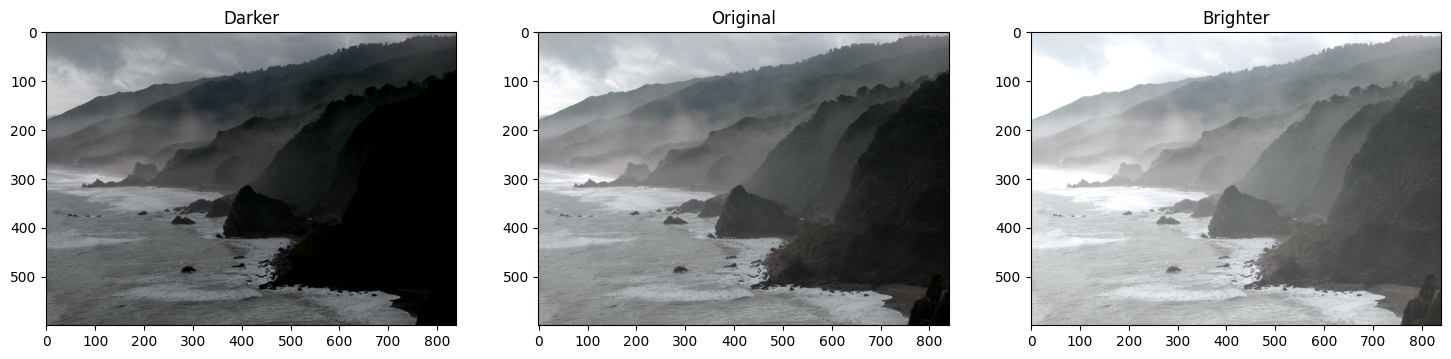

In [7]:
matrix = np.ones(img_rgb.shape, dtype="uint8") * 50

img_rgb_brighter = cv2.add(img_rgb, matrix)
img_rgb_darker = cv2.subtract(img_rgb, matrix)

# Show the images
plt.figure(figsize=[18, 5])
plt.subplot(131); plt.imshow(img_rgb_darker); plt.title("Darker");
plt.subplot(132); plt.imshow(img_rgb); plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter); plt.title("Brighter");


# Multiplication or Contrast

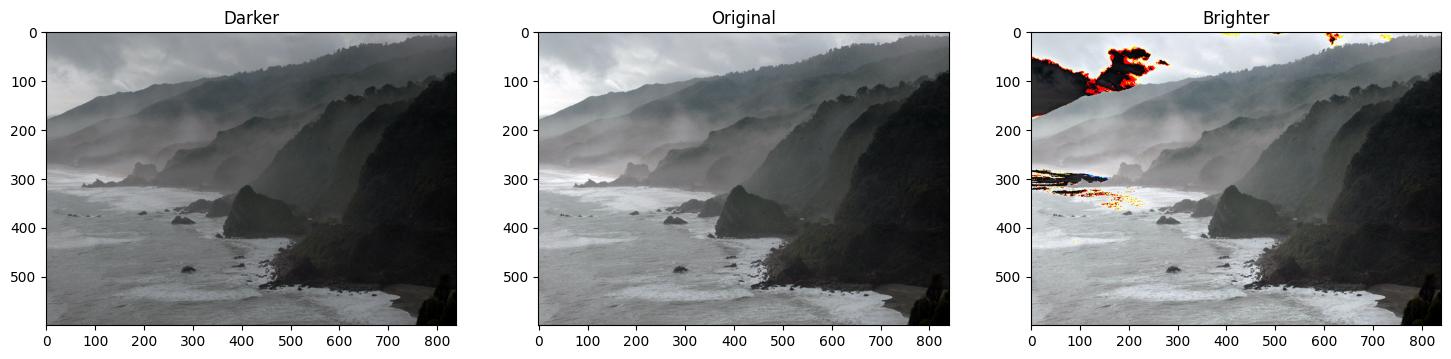

In [8]:
matrix_low_contrast = np.ones(img_rgb.shape) * 0.8
matrix_high_contrast = np.ones(img_rgb.shape) * 1.2

img_rgb_darker = np.uint8(cv2.multiply(np.float64(img_rgb), matrix_low_contrast))
img_rgb_brighter = np.uint8(cv2.multiply(np.float64(img_rgb), matrix_high_contrast))

# Show the images
plt.figure(figsize=[18, 5])
plt.subplot(131); plt.imshow(img_rgb_darker); plt.title("Darker");
plt.subplot(132); plt.imshow(img_rgb); plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter); plt.title("Brighter");


## Handling Overflow using np.clip

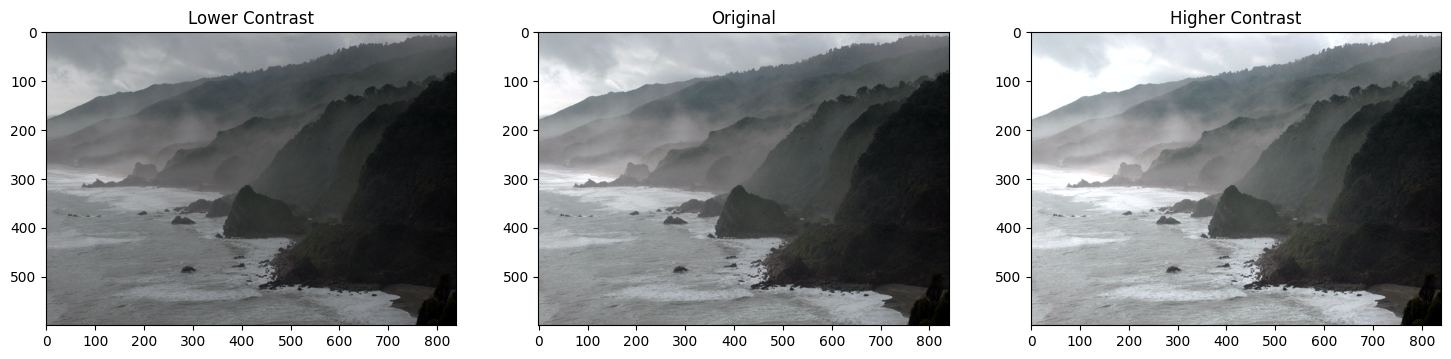

In [9]:
matrix_low_contrast = np.ones(img_rgb.shape) * 0.8
matrix_high_contast = np.ones(img_rgb.shape) * 1.2

img_rgb_lower  = np.uint8(cv2.multiply(np.float64(img_rgb), matrix_low_contrast))
img_rgb_higher = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), matrix_high_contast), 0, 255))

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_lower); plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(img_rgb);       plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_higher);plt.title("Higher Contrast");

# Image Thresholding

(572, 800)


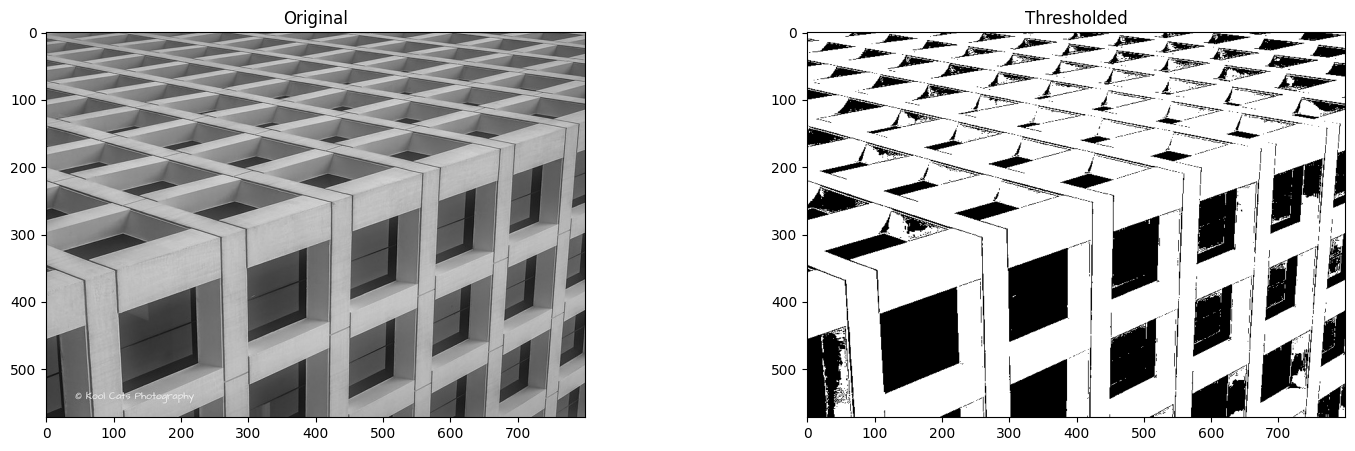

In [10]:
img_read = cv2.imread("building-windows.jpg", cv2.IMREAD_GRAYSCALE)
retval, img_thresh = cv2.threshold(img_read, 100, 255, cv2.THRESH_BINARY)

# Show the images
plt.figure(figsize=[18, 5])

plt.subplot(121); plt.imshow(img_read, cmap="gray"); plt.title("Original");
plt.subplot(122); plt.imshow(img_thresh, cmap="gray"); plt.title("Thresholded");

print(img_thresh.shape)

# Application: Sheet Music Reader

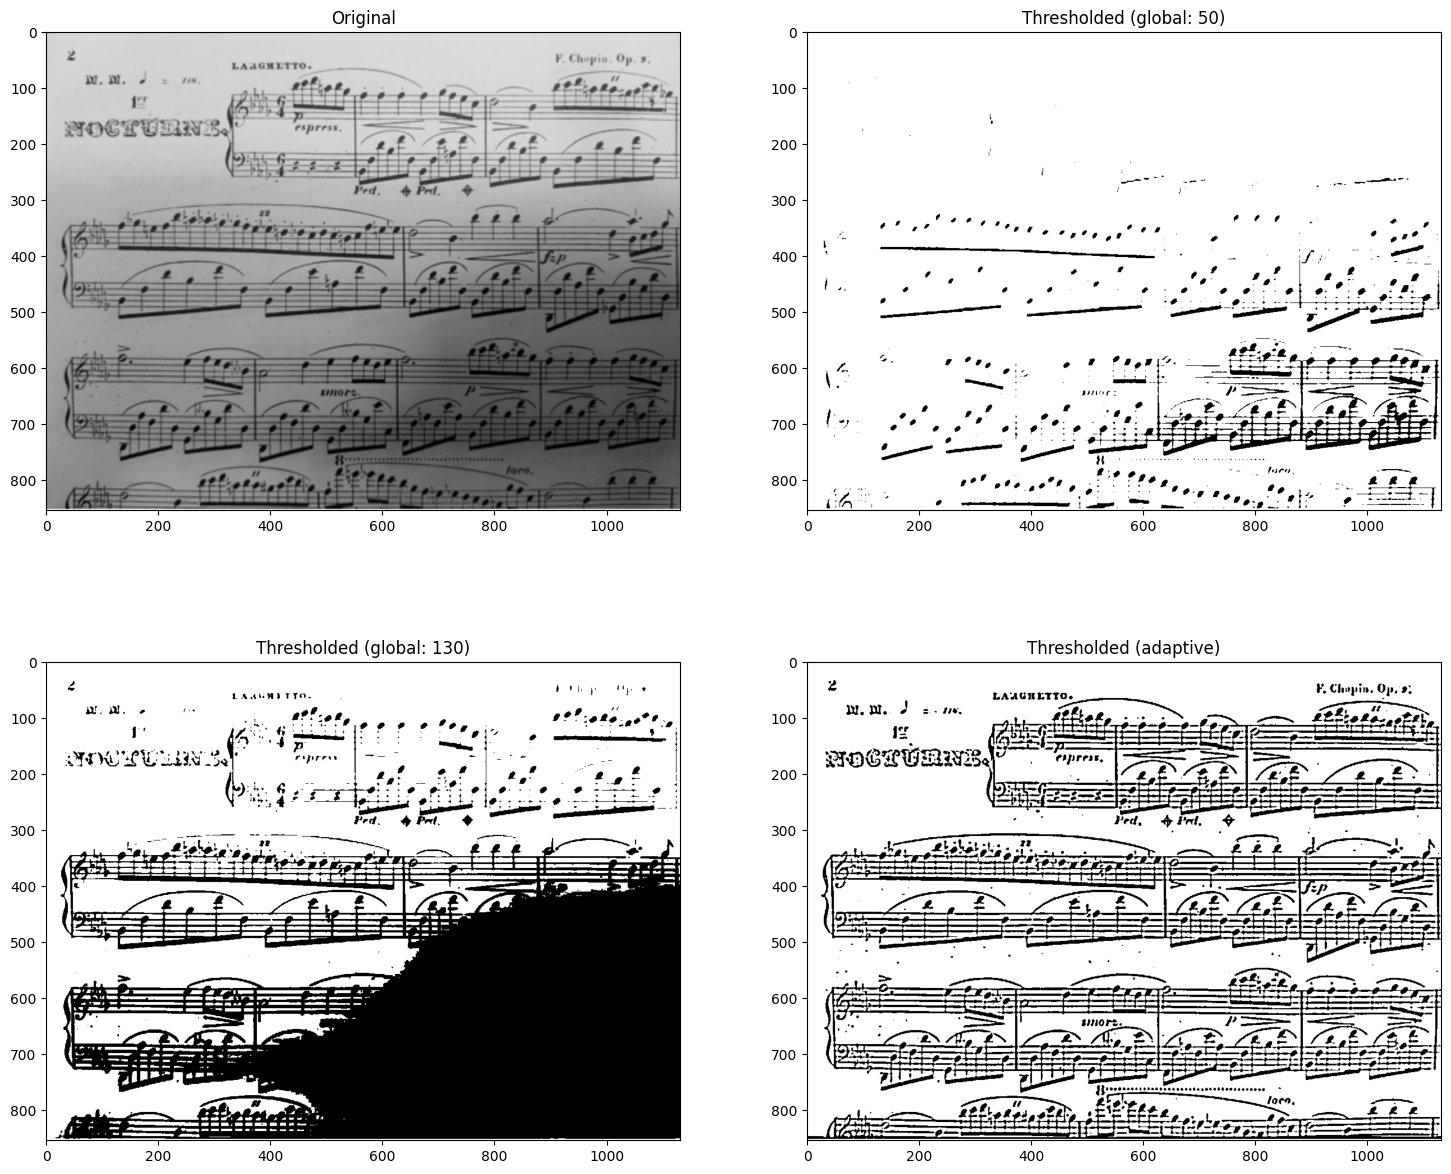

In [11]:
# Read the original image
img_read = cv2.imread("Piano_Sheet_Music.png", cv2.IMREAD_GRAYSCALE)

# Perform global thresholding
retval, img_thresh_gbl_1 = cv2.threshold(img_read, 50, 255, cv2.THRESH_BINARY)

# Perform global thresholding
retval, img_thresh_gbl_2 = cv2.threshold(img_read, 130, 255, cv2.THRESH_BINARY)

# Perform adaptive thresholding
img_thresh_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

# Show the images
plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(img_read,        cmap="gray");  plt.title("Original");
plt.subplot(222); plt.imshow(img_thresh_gbl_1,cmap="gray");  plt.title("Thresholded (global: 50)");
plt.subplot(223); plt.imshow(img_thresh_gbl_2,cmap="gray");  plt.title("Thresholded (global: 130)");
plt.subplot(224); plt.imshow(img_thresh_adp,  cmap="gray");  plt.title("Thresholded (adaptive)");

# Bitwise Operations

(200, 499)


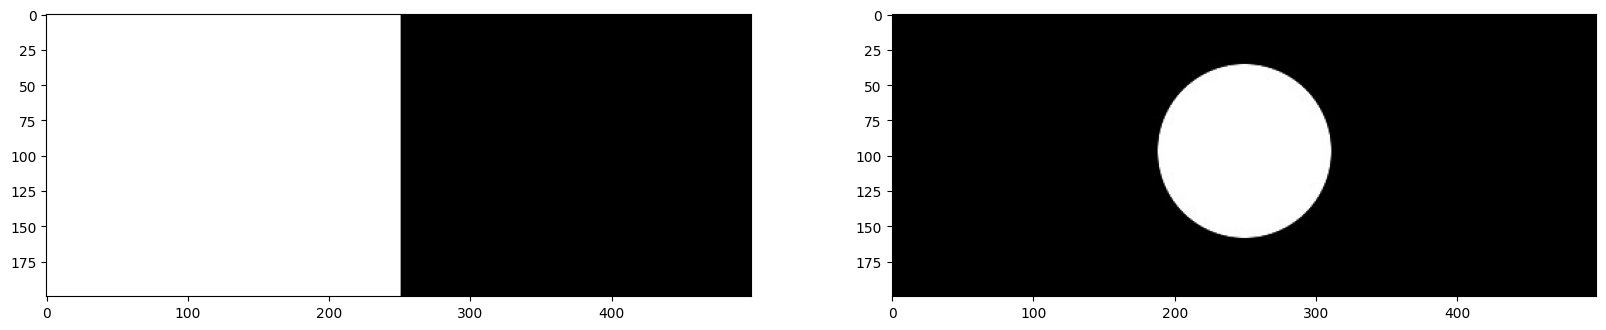

In [12]:
img_rec = cv2.imread("rectangle.jpg", cv2.IMREAD_GRAYSCALE)

img_cir = cv2.imread("circle.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[20, 5])
plt.subplot(121);plt.imshow(img_rec, cmap="gray")
plt.subplot(122);plt.imshow(img_cir, cmap="gray")
print(img_rec.shape)

# Bitwise AND Operator

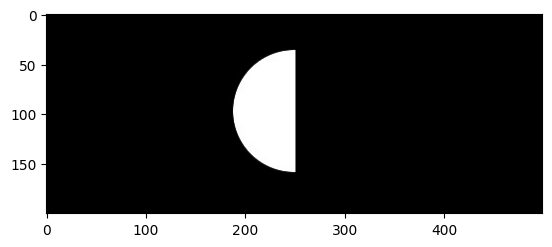

In [13]:
result = cv2.bitwise_and(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")

# Bitwise OR Operator

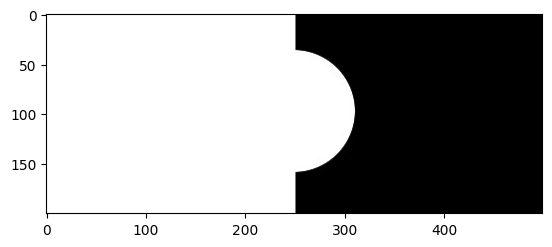

In [14]:
result = cv2.bitwise_or(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")

# Bitwise XOR Operator

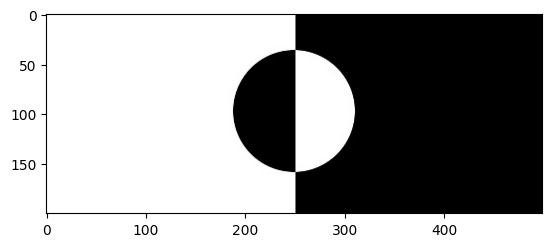

In [15]:
result = cv2.bitwise_xor(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")